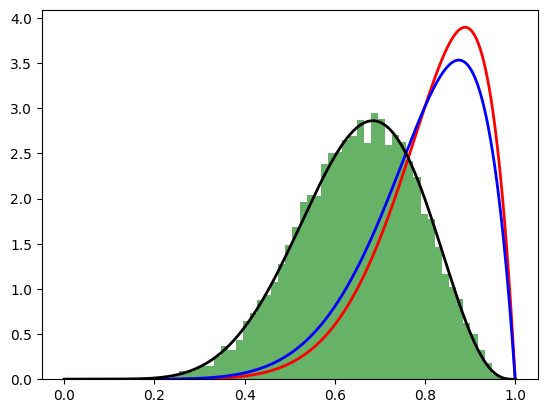

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import beta

# parameters
a1, b1, a2, b2 = 9, 2, 8, 2
N = 10000

# generate samples
X = beta.rvs(a1, b1, N)
Y = beta.rvs(a2, b2, N)
Z = X * Y

# use MLE to estimate the parameters of the beta distribution from Z
a_hat, b_hat, _, _ = beta.fit(Z, method = 'MM', floc = 0, fscale = 1)

z = np.linspace(0, 1, 1000)
plt.plot(z, beta.pdf(z, a1, b1), 'r-', lw = 2, label = 'X ~ Beta(9, 2)')
plt.plot(z, beta.pdf(z, a2, b2), 'b-', lw = 2, label = 'Y ~ Beta(8, 2)')
plt.hist(Z, bins = 50, density = True, alpha = 0.6, color = 'g')
plt.plot(z, beta.pdf(z, a_hat, b_hat), 'k-', lw = 2, label = 'Z ~ Beta(9.5, 2)')
plt.show()

In [18]:
from scipy.stats import beta

def unit_serial(a1, b1, a2, b2):
    # generate samples
    N = 50000
    X = beta.rvs(a1, b1, size=N)
    Y = beta.rvs(a2, b2, size=N)
    Z = X * Y
    # use MLE to estimate the parameters of the beta distribution form Z
    a, b, _, _ = beta.fit(Z, method='MM', floc=0, fscale=1)
    return a, b

a1, b1, a2, b2 = 9, 2, 8, 2
a, b = unit_serial(a1, b1, a2, b2)
print(a, b)

7.70577611823923 4.057749263192868


In [83]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.optimize import minimize

def LSM(a1, b1):
    # 設定 X, Y 的分配
    fx = lambda x: beta.pdf(x, a1, b1)
    # fy = lambda y: beta.pdf(y, a2, b2)

    # z = np.linspace(0, 1, 100)
    f = lambda z : fx(1 - np.sqrt(1 - z)) / (2 * np.sqrt(1 - z))  # define the integrand: inline

    # 用另一個貝他分配 \beta(a,b) 來近似 Z 的分配
    # 定義最小值函數
    def est_beta_param(params):
        a, b = params
        beta_pdf = lambda z: beta.pdf(z, a, b)
        integrand = lambda z: (f(z) - beta_pdf(z)) ** 2
        integral = integrate.quad(integrand, 0, 0.999)
        return integral[0]

    # 初始值
    initial = [2, 2]
    # 設定邊界
    bounds = [(0, np.inf), (0, np.inf)]

    # 使用 minimize 來最小化目標函數
    result = minimize(est_beta_param, x0 = initial, bounds = bounds \
                        , method = 'trust-constr')

    # 獲取估計的參數
    a_hat, b_hat = result.x
    return a_hat, b_hat

a1, b1 = 9, 2
a_hat, b_hat = LSM(a1, b1)
print(f"Estimated parameters: a = {a_hat:.2f}, b = {b_hat:.2f}")

Estimated parameters: a = 18.05, b = 0.76


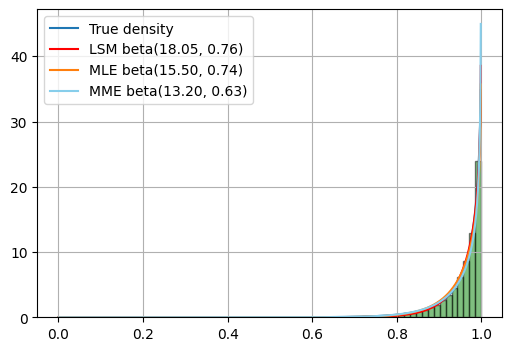

In [84]:
from scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# simulate the samples of fz
fx = lambda x: beta.pdf(x, a1, b1)

a1, b1 = 9, 2
n = 50000
x = beta.rvs(a1, b1, size = n)

# hist
Z = 1 - (1 - x) ** 2

# 估計
a3, b3, _, _ = beta.fit(Z, floc = 0, fscale = 1)
a_mme, b_mme, _, _ = beta.fit(Z, floc = 0, fscale = 1, method = 'MM')
# print(a3, b3)

# 理論 pdf
z = np.linspace(0, 0.999, 10000)
f = lambda z : fx(1 - np.sqrt(1 - z)) / (2 * np.sqrt(1 - z))
fz = np.vectorize(f)(z)


fig = plt.figure(figsize = (6, 4))
plt.plot(z, fz, label = 'True density')
plt.hist(Z, bins = 40, density = True, color = 'g', edgecolor = 'k', alpha = 0.5)
plt.plot(z, beta.pdf(z, a_hat, b_hat), label = 'LSM beta({:.2f}, {:.2f})'.format(a_hat, b_hat)
         , color = 'r') 
plt.plot(z, beta.pdf(z, a3, b3), label = 'MLE beta({:.2f}, {:.2f})'.format(a3, b3))
plt.plot(z, beta.pdf(z, a_mme, b_mme), label = 'MME beta({:.2f}, {:.2f})'.format(a_mme, b_mme)
         , color = 'skyblue') 
plt.legend()
plt.grid()
plt.show()